In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)      #선형 데이터 생성
y = 4 + 3 * X + np.random.randn(100, 1)     #가우시안 잡음

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  #모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)    #정규방정식을 사용해 세타계산, inv()함수로 역행렬계산, dot()메서드를 사용해 행렬 곱셈

In [ ]:
theta_best  #세타값 (4,3을 비슷하게 예측)

array([[4.05886284],
       [3.04980544]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] 
y_predict = X_new_b.dot(theta_best)
y_predict   #예측값

array([[ 4.05886284],
       [10.15847372]])

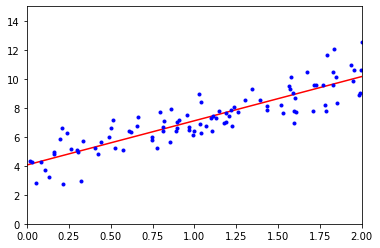

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()  #모델의 예측을 그래프로 표현

In [ ]:
from sklearn.linear_model import LinearRegression   #사이킷런을 사용한 선형회귀

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_   #intercept_: 편향, coef_: 가중치

(array([4.05886284]), array([[3.04980544]]))

In [ ]:
lin_reg.predict(X_new)  #예측값

array([[ 4.05886284],
       [10.15847372]])

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)    #LinearRegression 클래스는 scipy.linalg.lstsq()함수를 기반으로 함
theta_best_svd

array([[4.05886284],
       [3.04980544]])

In [ ]:
np.linalg.pinv(X_b).dot(y)  #유사역행렬

array([[4.05886284],
       [3.04980544]])

In [ ]:
eta = 0.1  #learning late
n_iterations = 1000     #1000번 학습
m = 100

theta = np.random.randn(2,1)  # 무작위초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [ ]:
theta   #BGD으로 계산한 세타값

array([[4.05886284],
       [3.04980544]])

In [ ]:
n_epochs = 50   #50번 학습
t0, t1 = 5, 50  #학습 스케쥴 하이퍼파라미터

def learning_schedule(t):   #확률적 경사 하강법
    return t0 / (t + t1)

theta = np.random.randn(2,1)  #무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [ ]:
theta   #SGD로 계산한 세타값

array([[4.08383869],
       [3.01205168]])

In [ ]:
from sklearn.linear_model import SGDRegressor   #사이킷런을 사용한 SGD

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)    #1000번 epochs 실행 또는 한 epoch에서 0.001보다 적게 loss가 줄어들때까지 실행, learning late는 0.1
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_   #사이킷런을 사용한 SGD 예측값

(array([4.04368003]), array([3.07989974]))

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3    #2차방정식으로 비선형 데이터 생성
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  #각 특성을 제곱하여 샐호운 특성 추가

In [ ]:
from sklearn.preprocessing import PolynomialFeatures    #사이킷런을 사용한 다항회귀
poly_features = PolynomialFeatures(degree=2, include_bias=False)    #dgree: 차수, include_bias=True 일때 편향을 위한 특성 1이 추가
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.39109496])

In [ ]:
X_poly[0]   #X_poly는 원래 특성 X와 이 특성의 제곱을 포함

array([-2.39109496,  5.71733509])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.88131178]), array([[0.98195164, 0.49691401]]))

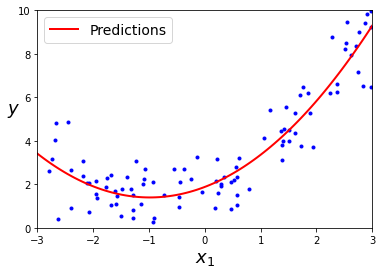

In [47]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()  #모델의 예측 그래프 표현